In [ ]:
#train a regression tree model
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/pu9kbeSaAtRZ7RxdJKX9_A/yellow-tripdata.csv'
raw_data = pd.read_csv(url)
print(raw_data)


       VendorID  passenger_count  trip_distance  RatecodeID  \
0             2                1          17.63           2   
1             2                1          19.52           2   
2             2                1          17.81           2   
3             2                2          19.30           2   
4             2                1          18.75           2   
...         ...              ...            ...         ...   
41197         2                1          16.94           2   
41198         2                4          19.83           2   
41199         2                1          17.31           2   
41200         2                1          17.28           2   
41201         2                1          16.82           2   

       store_and_fwd_flag  PULocationID  DOLocationID  payment_type  \
0                       1           132           164             1   
1                       1           132           236             1   
2                       1     

VendorID                      NaN
passenger_count          0.015081
trip_distance            0.101819
RatecodeID               0.094075
store_and_fwd_flag       0.000320
PULocationID            -0.023086
DOLocationID             0.024348
payment_type                  NaN
fare_amount              0.200638
mta_tax                 -0.054488
tolls_amount             0.116172
improvement_surcharge   -0.000727
tip_amount               1.000000
Name: tip_amount, dtype: float64
VendorID                 0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
mta_tax                  0
tolls_amount             0
improvement_surcharge    0
tip_amount               0
dtype: int64


<Axes: >

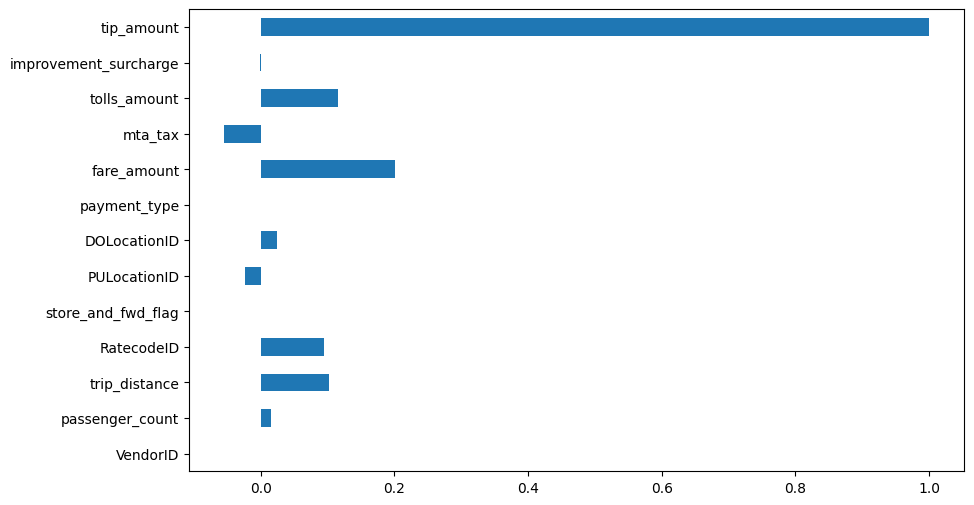

In [6]:
correlation =raw_data.corr()['tip_amount']
print(correlation)
print(raw_data.isnull().sum())
correlation.plot(kind='barh', figsize=(10, 6))

In [7]:
y = raw_data[['tip_amount']].values.astype('float32')

# drop the target variable from the feature matrix
proc_data = raw_data.drop(['tip_amount'], axis=1)

# get the feature matrix used for training
X = proc_data.values

# normalize the feature matrix
X = normalize(X, axis=1, norm='l1', copy=False)
print(X)

[[0.00501165 0.00250583 0.04417771 ... 0.00125291 0.01739043 0.00250583]
 [0.00422869 0.00211434 0.04127199 ... 0.00105717 0.01467355 0.00211434]
 [0.0070609  0.00353045 0.06287732 ... 0.00176523 0.02450132 0.00353045]
 ...
 [0.00537996 0.00268998 0.04656355 ... 0.00134499 0.01866846 0.00268998]
 [0.00427606 0.00213803 0.03694518 ... 0.00106902 0.01483794 0.00213803]
 [0.00494731 0.00247366 0.04160689 ... 0.00123683 0.01716717 0.00247366]]


In [11]:
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dt_reg = DecisionTreeRegressor(criterion = 'squared_error', max_depth=8, random_state=35)
dt_reg.fit(X_train, y_train)
y_pred = dt_reg.predict(X_test)
print(y_train )
print(y_pred)

[[20.23]
 [14.8 ]
 [ 8.  ]
 ...
 [16.19]
 [10.  ]
 [20.23]]
[14.43893014 13.47723817 16.36184052 ... 14.43893014 14.43893014
 13.47723817]


In [12]:
mse_score = mean_squared_error(y_test, y_pred)
print('MSE score : {0:.3f}'.format(mse_score))

r2_score = dt_reg.score(X_test,y_test)
print('R^2 score : {0:.3f}'.format(r2_score))

MSE score : 24.555
R^2 score : 0.028
